In [1]:
import os
import sys

import pandas as pd

module_path = os.path.abspath(os.path.join("../src"))
if module_path not in sys.path:
    sys.path.append(module_path)

from data import *

# Reading in the dataset

In [2]:
file_name = "cascaded_use_case_data.xlsx"
data_dir = "../data"

In [3]:
raw_data_path = os.path.abspath(os.path.join(data_dir, "raw_data", file_name))
if os.path.isfile(raw_data_path):
    data = data = pd.read_excel(raw_data_path)
else:
    raise FileNotFoundError(
        "Raw data file does not exist at path: {}".format(raw_data_path)
    )

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datetime                         63288 non-null  datetime64[ns]
 1   Vindhastighet Nilsebu            62955 non-null  float64       
 2   Lufttemp. Nilsebu                63102 non-null  float64       
 3   Vindretning Nilsebu              63079 non-null  float64       
 4   RelHum Nilsebu                   63079 non-null  float64       
 5   Vannstand Lyngsåna               50380 non-null  float64       
 6   Vanntemp. Hiafossen              50192 non-null  float64       
 7   Vannstand Hiafossen              50192 non-null  float64       
 8   Lufttemp Fister                  63288 non-null  float64       
 9   Nedbør Fister                    63288 non-null  float64       
 10  Q_Lyngsvatn_overlop              63286 non-null  float64  

In [5]:
data = data.rename(
    columns={
        # Rename columns to be more user-friendly
        "Vindhastighet Nilsebu": "Wind_Speed_Nilsebu",
        "Lufttemp. Nilsebu": "Air_Temperature_Nilsebu",
        "Vindretning Nilsebu": "Wind_Direction_Nilsebu",
        "RelHum Nilsebu": "Relative_Humidity_Nilsebu",
        "Vannstand Lyngsana": "Water_Level_Lyngsaana",
        "Vanntemp. Hiafossen": "Water_Temperature_Hiafossen",
        "Vannstand Hiafossen": "Water_Level_Hiafossen",
        "Lufttemp Fister": "Air_Temperature_Fister",
        "Nedbør Fister": "Precipitation_Fister",
        "Q_Lyngsvatn_overlop": "Flow_Lyngsvatn_Overflow",
        "Q_tapping": "Flow_Tapping",
        "Vannstand Kalltveit": "Water_Level_Kalltveit",
        "Q_Kalltveit": "Flow_Kalltveit",
        "Vanntemp. Kalltveit kum": "Water_Temperature_Kalltveit_Kum",
        "Nedbør Nilsebu": "Precipitation_Nilsebu",
        "Vanntemp. Hiavatn": "Water_Temperature_Hiavatn",
        "Vannstand Hiavatn": "Water_Level_Hiavatn",
        "Vanntemp. Musdalsvatn": "Water_Temperature_Musdalsvatn",
        "Vannstand Musdalsvatn": "Water_Level_Musdalsvatn",
        "Vanntemp. Musdalsvatn nedstrøms": "Water_Temperature_Musdalsvatn_Downstream",
        "Vannstand Musdalsvatn nedstrøms": "Water_Level_Musdalsvatn_Downstream",
        "Vanntemp. Viglesdalsvatn": "Water_Temperature_Viglesdalsvatn",
        "Vannstand Viglesdalsvatn": "Water_Level_Viglesdalsvatn",
        "Q_HBV": "Flow_HBV",
        "PRECIP_HBV": "Precipitation_HBV",
        "TEMP_HBV": "Temperature_HBV",
        "SNOW_MELT_HBV": "SNOW_MELT_HBV",
        "SNOW_SWE_HBV": "Snow_Water_Equivalent_HBV",
        "Evap_HBV": "Evaporation_HBV",
        "SOIL_WAT_HBV": "Soil_Water_Storage_HBV",
        "GR_WAT_HBV": "Groundwater_Storage_HBV",
        "Q_Kalltveit_uten_tapping": "Flow_Without_Tapping_Kalltveit",
        "Q_HBV_mean": "Mean_Flow_HBV",
        "Q_Lyngsaana": "Flow_Lyngsaana",
        "Vanntemp. Lyngsaana": "Water_Temperature_Lyngsaana",
        "Vanntemp. Kalltveit elv": "Water_Temperature_Kalltveit_River",
        "Vannstand Lyngsåna": "Water_Level_Lyngsaana",
        "Vanntemp. Lyngsåna": "Water_Temperature_Lyngsaana",
    }
)
data_copy = data.copy()

In [6]:
def show_missing_values(df):
    df_data = df
    total = df_data.isnull().sum().sort_values(ascending=False)
    percent = (df_data.isnull().sum() / df_data.isnull().count()).sort_values(
        ascending=False
    )
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_data

# Missing data visually using Missingno library

In [7]:
import missingno as msno

<Axes: >

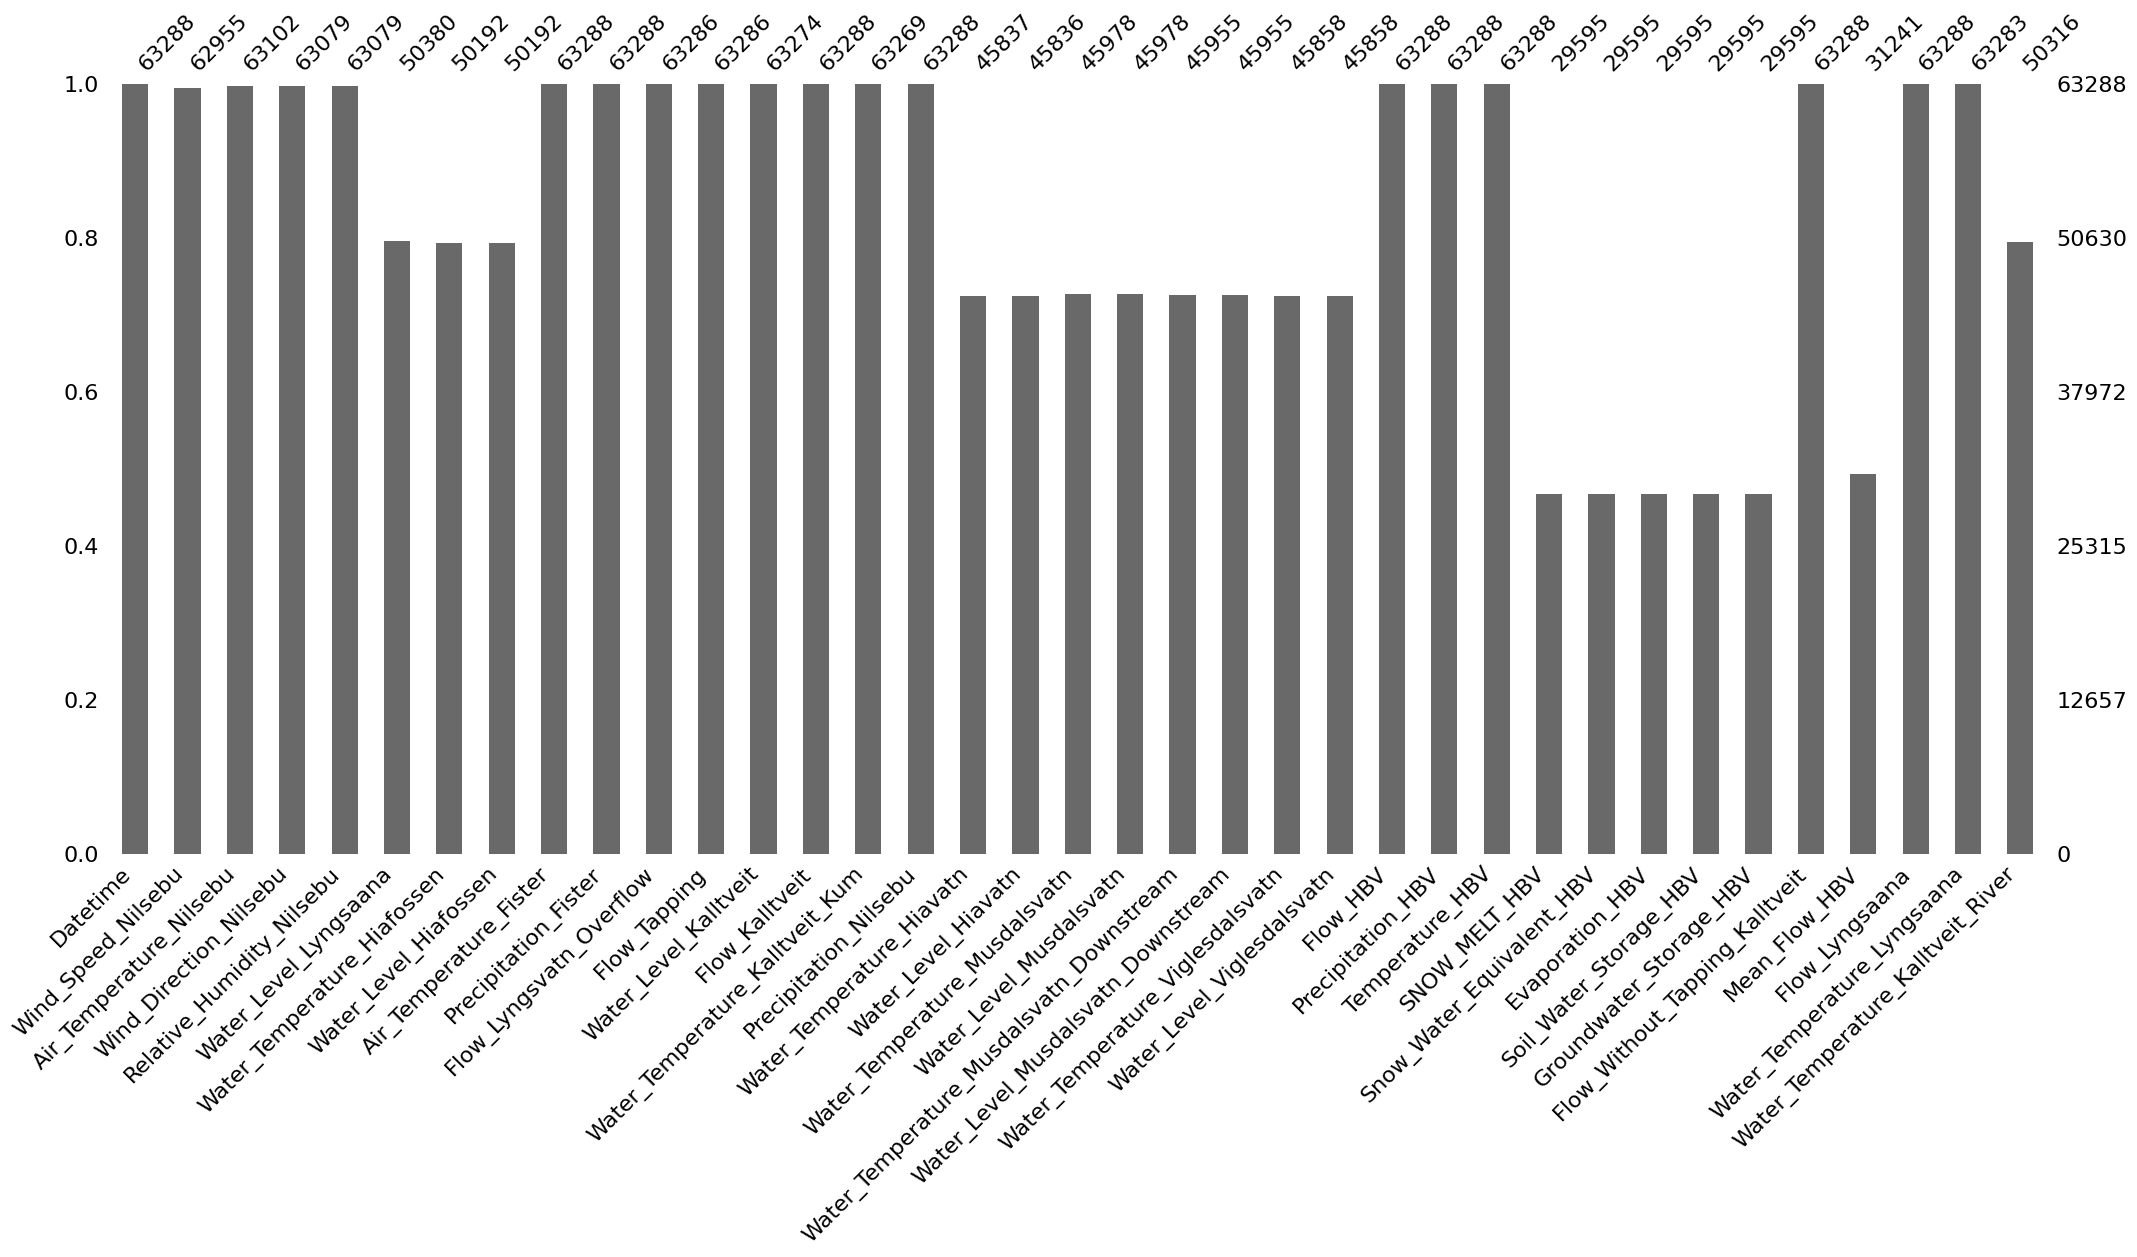

In [8]:
msno.bar(data_copy)

<Axes: >

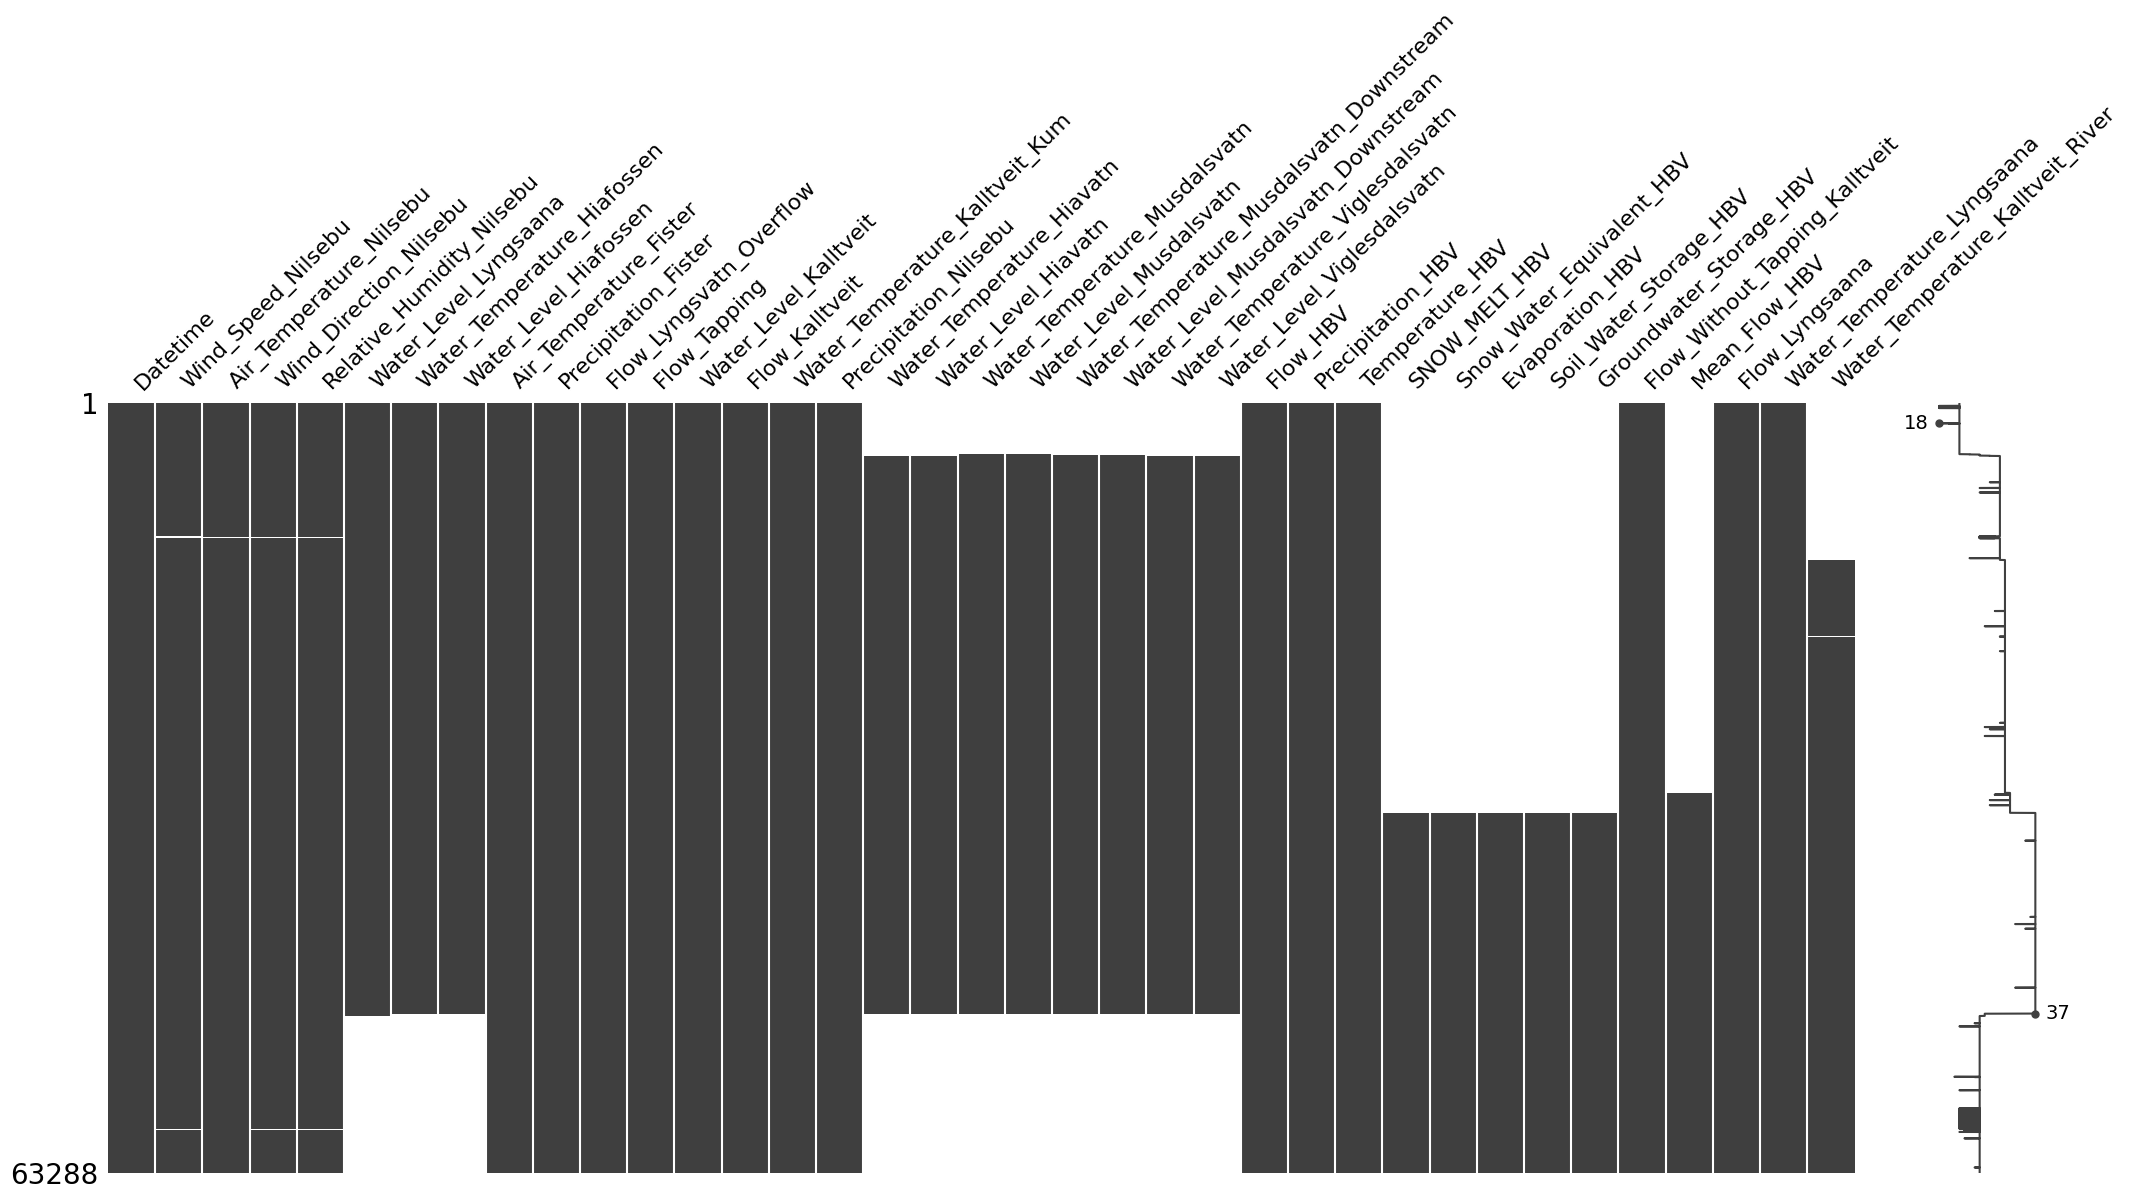

In [9]:
msno.matrix(data)

- All values with Water_* can be Missing Not at Random (MNAR), except for Water_Temperature_Lyngsaana, Water_Temperature_Kalltveit_Kum, and Water_Level_Kalltveit.
- SNOW_MELT_HBV, Snow_Water_Equivalent_HBV, Evaporation_HBV, Soil_Water_Storage_HBV, GroundWater_Storage_HBV, and Mean_Flow_HBV can also be MNAR.

<Axes: >

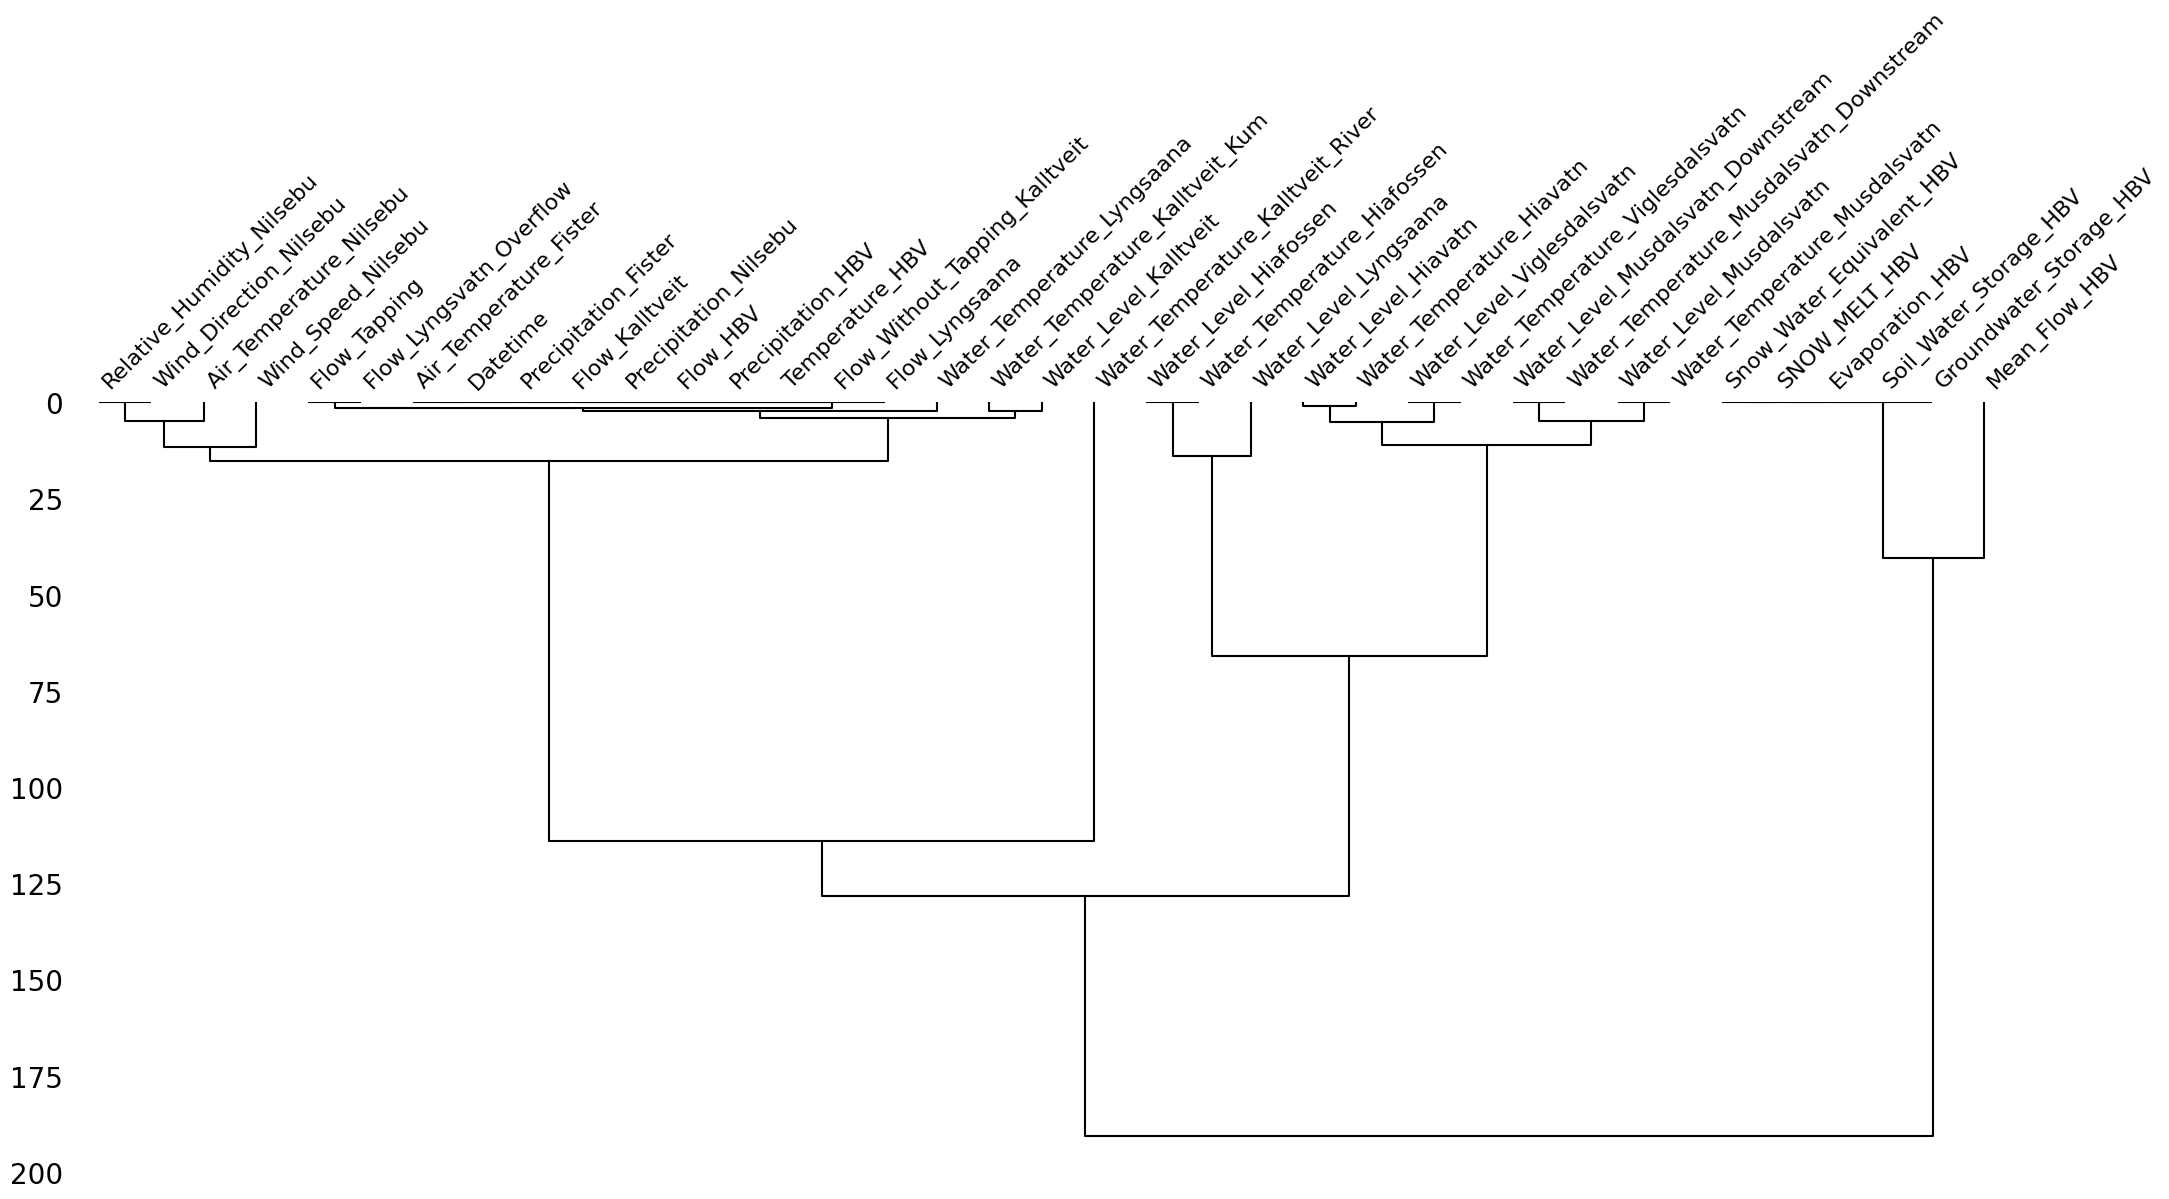

In [10]:
msno.dendrogram(data_copy)

- Groups the highly correlated variables together

In [11]:
data_copy.isnull().sum()

Datetime                                        0
Wind_Speed_Nilsebu                            333
Air_Temperature_Nilsebu                       186
Wind_Direction_Nilsebu                        209
Relative_Humidity_Nilsebu                     209
Water_Level_Lyngsaana                       12908
Water_Temperature_Hiafossen                 13096
Water_Level_Hiafossen                       13096
Air_Temperature_Fister                          0
Precipitation_Fister                            0
Flow_Lyngsvatn_Overflow                         2
Flow_Tapping                                    2
Water_Level_Kalltveit                          14
Flow_Kalltveit                                  0
Water_Temperature_Kalltveit_Kum                19
Precipitation_Nilsebu                           0
Water_Temperature_Hiavatn                   17451
Water_Level_Hiavatn                         17452
Water_Temperature_Musdalsvatn               17310
Water_Level_Musdalsvatn                     17310


I plan to divide the dataset into four subsets based on the available data. Each subset will represent a progressively refined dataset with an increase in the number of columns used but a decrease in the number of rows.

# Data that has all values

In [12]:
all_values = [
    "Datetime",
    "Air_Temperature_Fister",
    "Precipitation_Fister",
    "Flow_Kalltveit",
    "Flow_HBV",
    "Precipitation_Nilsebu",
    "Temperature_HBV",
    "Flow_Without_Tapping_Kalltveit",
    "Flow_Lyngsaana",
]
data_copy[all_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Datetime                        63288 non-null  datetime64[ns]
 1   Air_Temperature_Fister          63288 non-null  float64       
 2   Precipitation_Fister            63288 non-null  float64       
 3   Flow_Kalltveit                  63288 non-null  float64       
 4   Flow_HBV                        63288 non-null  float64       
 5   Precipitation_Nilsebu           63288 non-null  float64       
 6   Temperature_HBV                 63288 non-null  float64       
 7   Flow_Without_Tapping_Kalltveit  63288 non-null  float64       
 8   Flow_Lyngsaana                  63288 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 4.3 MB


# Examining the Target columns

In [13]:
data_copy["Flow_Kalltveit"].describe()

count    63288.000000
mean         6.509245
std          7.565526
min          0.000000
25%          2.683190
50%          4.097010
75%          7.141195
max        110.256270
Name: Flow_Kalltveit, dtype: float64

In [14]:
data_copy["Flow_Without_Tapping_Kalltveit"].describe()

count    63288.000000
mean         5.589386
std          7.764969
min          0.000000
25%          1.299561
50%          3.496592
75%          6.673359
max        110.256270
Name: Flow_Without_Tapping_Kalltveit, dtype: float64

# Handeling missing values
- Imputation and removal 

## First dataset

#### Flow_Lyngsvatn_Overflow

In [15]:
data_copy["Flow_Lyngsvatn_Overflow"].describe()

count    63286.000000
mean         0.035255
std          0.742100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.397800
Name: Flow_Lyngsvatn_Overflow, dtype: float64

In [16]:
data_temp = data_copy["Flow_Lyngsvatn_Overflow"]
np.where(data_temp.isnull())

(array([35973, 35974], dtype=int64),)

In [17]:
data_temp.iloc[35970:35980]

35970    0.0
35971    0.0
35972    0.0
35973    NaN
35974    NaN
35975    0.0
35976    0.0
35977    0.0
35978    0.0
35979    0.0
Name: Flow_Lyngsvatn_Overflow, dtype: float64

In [18]:
data_copy["Flow_Lyngsvatn_Overflow"].interpolate(method="linear", inplace=True)

In [19]:
data_copy["Flow_Lyngsvatn_Overflow"].iloc[35970:35980]

35970    0.0
35971    0.0
35972    0.0
35973    0.0
35974    0.0
35975    0.0
35976    0.0
35977    0.0
35978    0.0
35979    0.0
Name: Flow_Lyngsvatn_Overflow, dtype: float64

In [20]:
data_copy["Flow_Lyngsvatn_Overflow"].describe()

count    63288.000000
mean         0.035254
std          0.742089
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.397800
Name: Flow_Lyngsvatn_Overflow, dtype: float64

#### Flow_Tapping

In [21]:
data_copy_temp = data["Flow_Tapping"]
np.where(data_temp.isnull())

(array([], dtype=int64),)

In [22]:
data_temp.iloc[35970:35980]

35970    0.0
35971    0.0
35972    0.0
35973    0.0
35974    0.0
35975    0.0
35976    0.0
35977    0.0
35978    0.0
35979    0.0
Name: Flow_Lyngsvatn_Overflow, dtype: float64

In [23]:
data_copy["Flow_Tapping"].interpolate(method="linear", inplace=True)

In [24]:
data_copy["Flow_Tapping"].iloc[35970:35980]

35970    1.592862
35971    1.591902
35972    1.591902
35973    1.590931
35974    1.589959
35975    1.588988
35976    1.588988
35977    1.587701
35978    1.587780
35979    1.586323
Name: Flow_Tapping, dtype: float64

#### Water_Temperature_Lyngsaana

In [25]:
data_temp = data_copy["Water_Temperature_Lyngsaana"]
np.where(data_temp.isnull())

(array([ 1716, 17097, 17098, 62833, 62834], dtype=int64),)

In [26]:
data_temp.iloc[62830:62840]

62830    0.080078
62831    0.033817
62832    0.012835
62833         NaN
62834         NaN
62835    0.058203
62836    0.056641
62837    0.019922
62838    0.007031
62839   -0.008984
Name: Water_Temperature_Lyngsaana, dtype: float64

In [27]:
data_copy["Water_Temperature_Lyngsaana"].interpolate(method="linear", inplace=True)

In [28]:
data_copy["Water_Temperature_Lyngsaana"].iloc[62830:62840]

62830    0.080078
62831    0.033817
62832    0.012835
62833    0.027958
62834    0.043080
62835    0.058203
62836    0.056641
62837    0.019922
62838    0.007031
62839   -0.008984
Name: Water_Temperature_Lyngsaana, dtype: float64

#### Water_Level_Kalltveit

In [29]:
data_temp = data_copy["Water_Level_Kalltveit"]
np.where(data_temp.isnull())

(array([43208, 43209, 43210, 43211, 43212, 43213, 43214, 43215, 43216,
        43217, 43218, 43219, 43220, 43221], dtype=int64),)

In [30]:
data_temp.iloc[43200:43230]

43200    1.01981
43201    1.05979
43202    1.08738
43203    1.08651
43204    1.06477
43205    1.03802
43206    1.01377
43207    0.99475
43208        NaN
43209        NaN
43210        NaN
43211        NaN
43212        NaN
43213        NaN
43214        NaN
43215        NaN
43216        NaN
43217        NaN
43218        NaN
43219        NaN
43220        NaN
43221        NaN
43222    0.75000
43223    0.74738
43224    0.74700
43225    0.74700
43226    0.74638
43227    0.74438
43228    0.74150
43229    0.73838
Name: Water_Level_Kalltveit, dtype: float64

In [31]:
# Interpolate using the linear method
data_copy["Water_Level_Kalltveit"].interpolate(method="linear", inplace=True)

In [32]:
data_copy["Water_Level_Kalltveit"].iloc[43200:43230]

43200    1.019810
43201    1.059790
43202    1.087380
43203    1.086510
43204    1.064770
43205    1.038020
43206    1.013770
43207    0.994750
43208    0.978433
43209    0.962117
43210    0.945800
43211    0.929483
43212    0.913167
43213    0.896850
43214    0.880533
43215    0.864217
43216    0.847900
43217    0.831583
43218    0.815267
43219    0.798950
43220    0.782633
43221    0.766317
43222    0.750000
43223    0.747380
43224    0.747000
43225    0.747000
43226    0.746380
43227    0.744380
43228    0.741500
43229    0.738380
Name: Water_Level_Kalltveit, dtype: float64

#### Water_Temperature_Kalltveit_Kum

In [33]:
data_temp = data_copy["Water_Temperature_Kalltveit_Kum"]
np.where(data_temp.isnull())

(array([20393, 20394, 20395, 20396, 20397, 43208, 43209, 43210, 43211,
        43212, 43213, 43214, 43215, 43216, 43217, 43218, 43219, 43220,
        43221], dtype=int64),)

In [34]:
data_temp.iloc[43200:43230]

43200    4.0625
43201    3.9625
43202    3.9000
43203    3.8125
43204    3.8000
43205    3.8000
43206    3.7375
43207    3.7000
43208       NaN
43209       NaN
43210       NaN
43211       NaN
43212       NaN
43213       NaN
43214       NaN
43215       NaN
43216       NaN
43217       NaN
43218       NaN
43219       NaN
43220       NaN
43221       NaN
43222    4.0625
43223    4.1000
43224    4.1375
43225    4.2000
43226    4.2625
43227    4.3000
43228    4.3250
43229    4.3875
Name: Water_Temperature_Kalltveit_Kum, dtype: float64

In [35]:
# Interpolate using the linear method
data_copy["Water_Temperature_Kalltveit_Kum"].interpolate(method="linear", inplace=True)

In [36]:
data_copy["Water_Temperature_Kalltveit_Kum"].iloc[43200:43230]

43200    4.062500
43201    3.962500
43202    3.900000
43203    3.812500
43204    3.800000
43205    3.800000
43206    3.737500
43207    3.700000
43208    3.724167
43209    3.748333
43210    3.772500
43211    3.796667
43212    3.820833
43213    3.845000
43214    3.869167
43215    3.893333
43216    3.917500
43217    3.941667
43218    3.965833
43219    3.990000
43220    4.014167
43221    4.038333
43222    4.062500
43223    4.100000
43224    4.137500
43225    4.200000
43226    4.262500
43227    4.300000
43228    4.325000
43229    4.387500
Name: Water_Temperature_Kalltveit_Kum, dtype: float64

#### Wind_Speed_Nilsebu

In [37]:
data_temp = data_copy["Air_Temperature_Nilsebu"]
print("Air_Temperature_Nilsebu:")
print(np.where(data_temp.isnull()))
data_temp = data_copy["Wind_Direction_Nilsebu"]
print("Wind_Direction_Nilsebu:")
print(np.where(data_temp.isnull()))
data_temp = data_copy["Relative_Humidity_Nilsebu"]
print("Relative_Humidity_Nilsebu:")
print(np.where(data_temp.isnull()))
data_temp = data_copy["Wind_Speed_Nilsebu"]
print("Wind_Speed_Nilsebu:")
print(np.where(data_temp.isnull()))

Air_Temperature_Nilsebu:
(array([  243,   269,   270,   271,   272,   278,   279,   288,   292,
         293,   296,   297,   298,   333,   334,   336,   343,   344,
         345,   346,   357,   366,   377,   379,   380,   381,   382,
         383,   403,   405,   406,   407,   413,   414,   419,  1667,
        6986,  7352,  7354,  7355, 10959, 10974, 10975, 10976, 10977,
       10978, 10983, 10987, 10997, 10998, 10999, 11003, 11004, 11010,
       11011, 11016, 11018, 11028, 11029, 11036, 11040, 11042, 11049,
       11054, 11063, 11071, 11072, 11082, 11083, 11084, 11085, 11087,
       11090, 11096, 11097, 11098, 11099, 11106, 11114, 11115, 18347,
       18348, 26632, 26633, 26634, 26635, 27369, 27370, 27371, 27372,
       27373, 27374, 27375, 32636, 32641, 33055, 33056, 33057, 42824,
       42828, 48057, 51231, 51236, 51244, 55379, 55380, 55381, 55382,
       55383, 55384, 55385, 55386, 56483, 57969, 58008, 58032, 58056,
       58080, 58104, 58128, 58152, 58176, 58200, 58224, 58248, 5

In [38]:
data_copy["Air_Temperature_Nilsebu"].interpolate(method="linear", inplace=True)
data_copy["Wind_Direction_Nilsebu"].interpolate(method="linear", inplace=True)
data_copy["Relative_Humidity_Nilsebu"].interpolate(method="linear", inplace=True)
data_copy["Wind_Speed_Nilsebu"].interpolate(method="linear", inplace=True)

In [39]:
show_missing_values(data_copy)

,Total,Percent
Groundwater_Storage_HBV,33693,0.532376
Soil_Water_Storage_HBV,33693,0.532376
Evaporation_HBV,33693,0.532376
Snow_Water_Equivalent_HBV,33693,0.532376
SNOW_MELT_HBV,33693,0.532376
Mean_Flow_HBV,32047,0.506368
Water_Level_Hiavatn,17452,0.275755
Water_Temperature_Hiavatn,17451,0.275739
Water_Level_Viglesdalsvatn,17430,0.275408
Water_Temperature_Viglesdalsvatn,17430,0.275408


In [40]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Datetime                                  63288 non-null  datetime64[ns]
 1   Wind_Speed_Nilsebu                        63288 non-null  float64       
 2   Air_Temperature_Nilsebu                   63288 non-null  float64       
 3   Wind_Direction_Nilsebu                    63288 non-null  float64       
 4   Relative_Humidity_Nilsebu                 63288 non-null  float64       
 5   Water_Level_Lyngsaana                     50380 non-null  float64       
 6   Water_Temperature_Hiafossen               50192 non-null  float64       
 7   Water_Level_Hiafossen                     50192 non-null  float64       
 8   Air_Temperature_Fister                    63288 non-null  float64       
 9   Precipitation_Fister        

### Handeling data errors

In [41]:
print(data_copy.describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        63288.000000             63288.000000            63288.000000   
mean           -14.747335                 3.636311              212.669817   
std            393.577498                 6.913977              113.912696   
min          -7999.000000               -20.700000              -99.900000   
25%              5.200000                -0.800000              132.700000   
50%              6.100000                 3.100000              215.000000   
75%              7.500000                 8.600000              325.800000   
max             22.100000                27.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               63288.000000           50380.000000   
mean                   64.457665               0.735474   
std                    43.162296               0.182148   
min                   -99.900000               0.331000   
25

- Wind_Speed_Nilsebu has a very low minimum value (-7999.00), which might indicate an error in the dataset
- Water_Level_Kalltveit and Water_Temperature_Kalltveit_Kum also have negative mean values and very low minimum values (-9999), which again might indicate errors 

In [42]:
def error_handling(df, variable):
    # Replace negative values with NaNs
    df.loc[df[variable] < 0, variable] = np.nan
    # Perform linear interpolation
    df[variable] = df[variable].interpolate(method="linear")

In [43]:
data_copy[data_copy["Wind_Speed_Nilsebu"] < 0].index

Int64Index([  220,   242,   243,   244,   245,   246,   247,   248,   249,
              250,
            ...
            51246, 51247, 51248, 51249, 51250, 56888, 59913, 59914, 59915,
            59916],
           dtype='int64', length=373)

In [44]:
data_copy["Wind_Speed_Nilsebu"].iloc[59910:59930]

59910       8.800
59911       9.100
59912       8.900
59913   -7999.000
59914   -5997.825
59915   -3996.650
59916   -1995.475
59917       5.700
59918       6.700
59919       7.100
59920       5.400
59921       5.000
59922       6.200
59923       7.200
59924       7.700
59925       6.500
59926       6.400
59927       6.400
59928       7.200
59929       4.600
Name: Wind_Speed_Nilsebu, dtype: float64

- Data errors or placeholders for missing or corrupted data

In [45]:
error_handling(data_copy, "Wind_Speed_Nilsebu")

In [46]:
data_copy[data_copy["Water_Level_Kalltveit"] < 0].index

Int64Index([ 1880,  1881,  4037,  4038, 19175, 19176, 19177, 19178, 19179,
            19180,
            ...
            59532, 59533, 59534, 59535, 59536, 59537, 59538, 59539, 59540,
            59541],
           dtype='int64', length=170)

In [47]:
data_copy["Water_Level_Kalltveit"].iloc[59521:59550]

59521       0.80001
59522       0.80800
59523   -9999.00000
59524   -9999.00000
59525   -9999.00000
59526   -9999.00000
59527   -9999.00000
59528   -9999.00000
59529   -9999.00000
59530   -9999.00000
59531   -9999.00000
59532   -9999.00000
59533   -9999.00000
59534   -9999.00000
59535   -9999.00000
59536   -9999.00000
59537   -9999.00000
59538   -9999.00000
59539   -9999.00000
59540   -9999.00000
59541   -9999.00000
59542       0.76800
59543       0.76038
59544       0.75275
59545       0.74538
59546       0.73888
59547       0.73225
59548       0.72625
59549       0.72063
Name: Water_Level_Kalltveit, dtype: float64

In [48]:
error_handling(data_copy, "Water_Level_Kalltveit")

In [49]:
data_copy[data_copy["Water_Temperature_Kalltveit_Kum"] < 0].index

Int64Index([ 1880,  1881,  4037,  4038, 16304, 16305, 16306, 16307, 16308,
            16309,
            ...
            59532, 59533, 59534, 59535, 59536, 59537, 59538, 59539, 59540,
            59541],
           dtype='int64', length=206)

In [50]:
data_copy["Water_Temperature_Kalltveit_Kum"].iloc[59521:59550]

59521       8.3000
59522       8.3000
59523   -9999.0000
59524   -9999.0000
59525   -9999.0000
59526   -9999.0000
59527   -9999.0000
59528   -9999.0000
59529   -9999.0000
59530   -9999.0000
59531   -9999.0000
59532   -9999.0000
59533   -9999.0000
59534   -9999.0000
59535   -9999.0000
59536   -9999.0000
59537   -9999.0000
59538   -9999.0000
59539   -9999.0000
59540   -9999.0000
59541   -9999.0000
59542       8.3000
59543       8.3000
59544       8.3000
59545       8.3000
59546       8.3000
59547       8.2500
59548       8.2500
59549       8.2375
Name: Water_Temperature_Kalltveit_Kum, dtype: float64

In [51]:
error_handling(data_copy, "Water_Temperature_Kalltveit_Kum")

In [52]:
print(data_copy.describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        63288.000000             63288.000000            63288.000000   
mean             6.331432                 3.636311              212.669817   
std              2.232769                 6.913977              113.912696   
min              0.100000               -20.700000              -99.900000   
25%              5.200000                -0.800000              132.700000   
50%              6.100000                 3.100000              215.000000   
75%              7.500000                 8.600000              325.800000   
max             22.100000                27.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               63288.000000           50380.000000   
mean                   64.457665               0.735474   
std                    43.162296               0.182148   
min                   -99.900000               0.331000   
25

#### Wind_Direction_Nilsebu  
- Wind direction measurements (0 to 360 degrees), having negative values is unexpected and suggests an issue with data.

In [53]:
data_copy[data_copy["Wind_Direction_Nilsebu"] < 0].index

Int64Index([  244,   245,   247,   251,   252,   253,   254,   255,   256,
              257,
            ...
            51234, 51237, 51240, 51241, 51242, 51245, 51246, 60442, 60443,
            60445],
           dtype='int64', length=285)

In [54]:
data_copy["Wind_Direction_Nilsebu"].iloc[240:300]

240    310.900000
241    311.200000
242    299.900000
243    100.000000
244    -99.900000
245    -99.900000
246    299.900000
247    -99.900000
248    299.900000
249    299.900000
250    299.900000
251    -99.900000
252    -99.900000
253    -99.900000
254    -99.900000
255    -99.900000
256    -99.900000
257    -99.900000
258    -99.900000
259    299.900000
260    299.900000
261    299.900000
262    -99.900000
263    299.900000
264    299.900000
265    -99.900000
266    299.900000
267    299.900000
268    -99.900000
269    -19.940000
270     60.020000
271    139.980000
272    219.940000
273    299.900000
274    299.900000
275    -99.900000
276    299.900000
277    299.900000
278    166.633333
279     33.366667
280    -99.900000
281    -99.900000
282    299.900000
283    -99.900000
284    299.900000
285    299.900000
286    -99.900000
287    299.900000
288    100.000000
289    -99.900000
290    299.900000
291    299.900000
292    166.633333
293     33.366667
294    -99.900000
295    -99

In [55]:
error_handling(data_copy, "Wind_Direction_Nilsebu")

#### Relative_Humidity_Nilsebu
- Relative humidity typically ranges from 0 to 100%, where 0% indicates completely dry air and 100% represents air saturated with moisture

In [56]:
data_copy[data_copy["Relative_Humidity_Nilsebu"] < 0].index

Int64Index([33159, 34201, 34271, 34272, 34289, 34292, 34301, 34302, 34305,
            34309,
            ...
            62469, 62471, 62589, 62592, 62650, 62655, 62656, 62659, 62788,
            62810],
           dtype='int64', length=1290)

In [57]:
print(data_copy["Relative_Humidity_Nilsebu"].iloc[34300:34350])

34300     0.1
34301   -99.9
34302   -99.9
34303    99.6
34304     0.1
34305   -99.9
34306     0.1
34307     0.1
34308     0.1
34309   -99.9
34310     0.1
34311    99.6
34312     0.1
34313     0.1
34314   -99.9
34315   -99.9
34316     0.1
34317     0.1
34318     0.1
34319     0.1
34320    99.5
34321     0.1
34322     0.1
34323   -99.9
34324     0.1
34325     0.1
34326   -99.9
34327     0.1
34328     0.1
34329   -99.9
34330   -99.9
34331     0.1
34332     0.1
34333    99.6
34334    99.5
34335     0.1
34336     0.1
34337     0.1
34338     0.1
34339     0.1
34340    99.5
34341    99.6
34342    99.6
34343    99.6
34344    99.5
34345    99.5
34346    99.5
34347    99.6
34348    99.5
34349    99.6
Name: Relative_Humidity_Nilsebu, dtype: float64


In [58]:
error_handling(data_copy, "Relative_Humidity_Nilsebu")

In [59]:
print(data_copy.describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        63288.000000             63288.000000            63288.000000   
mean             6.331432                 3.636311              213.811545   
std              2.232769                 6.913977              112.390304   
min              0.100000               -20.700000                0.000000   
25%              5.200000                -0.800000              134.000000   
50%              6.100000                 3.100000              216.050000   
75%              7.500000                 8.600000              325.800000   
max             22.100000                27.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               63288.000000           50380.000000   
mean                   66.726703               0.735474   
std                    37.110926               0.182148   
min                     0.000000               0.331000   
25

### Save the first clean dataframe

In [60]:
first_clean_data = data_copy.dropna(axis=1)
first_clean_data.isnull().sum()

Datetime                           0
Wind_Speed_Nilsebu                 0
Air_Temperature_Nilsebu            0
Wind_Direction_Nilsebu             0
Relative_Humidity_Nilsebu          0
Air_Temperature_Fister             0
Precipitation_Fister               0
Flow_Lyngsvatn_Overflow            0
Flow_Tapping                       0
Water_Level_Kalltveit              0
Flow_Kalltveit                     0
Water_Temperature_Kalltveit_Kum    0
Precipitation_Nilsebu              0
Flow_HBV                           0
Precipitation_HBV                  0
Temperature_HBV                    0
Flow_Without_Tapping_Kalltveit     0
Flow_Lyngsaana                     0
Water_Temperature_Lyngsaana        0
dtype: int64

In [61]:
data_path = os.path.abspath(os.path.join("../data"))
file_path = os.path.join(data_path, "clean_data", "cleaned_data_1.csv")
first_clean_data.to_csv(file_path, index=False)

In [62]:
first_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datetime                         63288 non-null  datetime64[ns]
 1   Wind_Speed_Nilsebu               63288 non-null  float64       
 2   Air_Temperature_Nilsebu          63288 non-null  float64       
 3   Wind_Direction_Nilsebu           63288 non-null  float64       
 4   Relative_Humidity_Nilsebu        63288 non-null  float64       
 5   Air_Temperature_Fister           63288 non-null  float64       
 6   Precipitation_Fister             63288 non-null  float64       
 7   Flow_Lyngsvatn_Overflow          63288 non-null  float64       
 8   Flow_Tapping                     63288 non-null  float64       
 9   Water_Level_Kalltveit            63288 non-null  float64       
 10  Flow_Kalltveit                   63288 non-null  float64  

## Second dataset

#### Water_Level_Hiafossen

In [63]:
data_temp = data_copy["Water_Level_Hiafossen"]
np.where(data_temp.isnull())

(array([ 1714, 12754, 50194, ..., 63285, 63286, 63287], dtype=int64),)

In [64]:
data_copy["Water_Level_Hiafossen"].iloc[50190:]

50190    0.933
50191    0.933
50192    0.933
50193    0.933
50194      NaN
         ...  
63283      NaN
63284      NaN
63285      NaN
63286      NaN
63287      NaN
Name: Water_Level_Hiafossen, Length: 13098, dtype: float64

In [65]:
last_valid_index = data_copy["Water_Level_Hiafossen"].last_valid_index()
last_valid_index

50193

In [66]:
data_copy = data_copy.loc[:last_valid_index]
data_temp = data_copy["Water_Level_Hiafossen"]
np.where(data_temp.isnull())

(array([ 1714, 12754], dtype=int64),)

In [67]:
data_copy["Water_Level_Hiafossen"].interpolate(method="linear", inplace=True)

#### Water_Temperature_Hiafossen 

In [68]:
data_temp = data_copy["Water_Temperature_Hiafossen"]
np.where(data_temp.isnull())

(array([ 1714, 12754], dtype=int64),)

In [69]:
data_copy["Water_Temperature_Hiafossen"].interpolate(method="linear", inplace=True)

#### Water_Level_Lyngsaana 

In [70]:
data_temp = data_copy["Water_Level_Lyngsaana"]
np.where(data_temp.isnull())

(array([ 1716, 17097, 17098], dtype=int64),)

In [71]:
data_copy["Water_Level_Lyngsaana"].interpolate(method="linear", inplace=True)

#### Water_Temperature_Kalltveit_River 

In [72]:
data_temp = data_copy["Water_Temperature_Kalltveit_River"]
np.where(data_temp.isnull())

(array([    0,     1,     2, ..., 19234, 26291, 42241], dtype=int64),)

### Handeling data errors

In [73]:
print(data_copy.dropna(axis=1).describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        50194.000000             50194.000000            50194.000000   
mean             6.289663                 3.865360              214.841823   
std              2.267517                 6.794072              111.789057   
min              0.100000               -20.000000                0.000000   
25%              5.100000                -0.600000              136.200000   
50%              6.100000                 3.400000              219.100000   
75%              7.500000                 8.700000              325.400000   
max             22.100000                27.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               50194.000000           50194.000000   
mean                   70.368369               0.735693   
std                    34.416710               0.182376   
min                     0.000000               0.331000   
25

- The overflow of Flow_Lyngsvatn is consistently zero across all values, likely due to the removal of a significant amount of data points

In [74]:
second_clean_data = data_copy.dropna(axis=1)
second_clean_data.isnull().sum()

Datetime                           0
Wind_Speed_Nilsebu                 0
Air_Temperature_Nilsebu            0
Wind_Direction_Nilsebu             0
Relative_Humidity_Nilsebu          0
Water_Level_Lyngsaana              0
Water_Temperature_Hiafossen        0
Water_Level_Hiafossen              0
Air_Temperature_Fister             0
Precipitation_Fister               0
Flow_Lyngsvatn_Overflow            0
Flow_Tapping                       0
Water_Level_Kalltveit              0
Flow_Kalltveit                     0
Water_Temperature_Kalltveit_Kum    0
Precipitation_Nilsebu              0
Flow_HBV                           0
Precipitation_HBV                  0
Temperature_HBV                    0
Flow_Without_Tapping_Kalltveit     0
Flow_Lyngsaana                     0
Water_Temperature_Lyngsaana        0
dtype: int64

## Save the second clean dataframe

In [75]:
second_clean_data = data_copy.dropna(axis=1)
file_path = os.path.join(data_path, "clean_data", "cleaned_data_2.csv")
second_clean_data.to_csv(file_path, index=False)

In [76]:
second_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50194 entries, 0 to 50193
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datetime                         50194 non-null  datetime64[ns]
 1   Wind_Speed_Nilsebu               50194 non-null  float64       
 2   Air_Temperature_Nilsebu          50194 non-null  float64       
 3   Wind_Direction_Nilsebu           50194 non-null  float64       
 4   Relative_Humidity_Nilsebu        50194 non-null  float64       
 5   Water_Level_Lyngsaana            50194 non-null  float64       
 6   Water_Temperature_Hiafossen      50194 non-null  float64       
 7   Water_Level_Hiafossen            50194 non-null  float64       
 8   Air_Temperature_Fister           50194 non-null  float64       
 9   Precipitation_Fister             50194 non-null  float64       
 10  Flow_Lyngsvatn_Overflow          50194 non-null  float64  

## Third dataset

In [77]:
data_copy = data_copy.reset_index(drop=True)

In [78]:
data_temp = data_copy["Water_Level_Hiavatn"]
np.where(data_temp.isnull())

(array([    0,     1,     2, ...,  4355, 12752, 50193], dtype=int64),)

In [79]:
first_valid_index = data_copy["Water_Level_Hiavatn"].first_valid_index()
first_valid_index

4356

In [80]:
last_valid_index = data_copy["Water_Level_Hiavatn"].last_valid_index()
last_valid_index

50192

In [81]:
data_copy["Water_Level_Hiavatn"].iloc[4350:4370]

4350      NaN
4351      NaN
4352      NaN
4353      NaN
4354      NaN
4355      NaN
4356    2.022
4357    2.020
4358    2.021
4359    2.024
4360    2.028
4361    2.034
4362    2.039
4363    2.045
4364    2.050
4365    2.055
4366    2.063
4367    2.075
4368    2.073
4369    2.082
Name: Water_Level_Hiavatn, dtype: float64

In [82]:
data_copy = data_copy.loc[first_valid_index:last_valid_index]

#### Water_Level_Hiavatn

In [83]:
data_temp = data_copy["Water_Level_Hiavatn"]
np.where(data_temp.isnull())

(array([8396], dtype=int64),)

In [84]:
data_copy["Water_Level_Hiavatn"].interpolate(method="linear", inplace=True)

#### Water_Temperature_Hiavatn

In [85]:
data_temp = data_copy["Water_Temperature_Hiavatn"]
np.where(data_temp.isnull())

(array([8396], dtype=int64),)

In [86]:
data_copy["Water_Temperature_Hiavatn"].interpolate(method="linear", inplace=True)

#### Water_Temperature_Musdalsvatn 

In [87]:
data_temp = data_copy["Water_Temperature_Musdalsvatn"]
np.where(data_temp.isnull())

(array([ 8395, 45836], dtype=int64),)

In [88]:
data_copy["Water_Temperature_Musdalsvatn"].interpolate(method="linear", inplace=True)

#### Water_Level_Musdalsvatn

In [89]:
data_temp = data_copy["Water_Level_Musdalsvatn"]
np.where(data_temp.isnull())

(array([ 8395, 45836], dtype=int64),)

In [90]:
data_copy["Water_Level_Musdalsvatn"].interpolate(method="linear", inplace=True)

#### Water_Temperature_Musdalsvatn_Downstream

In [91]:
data_temp = data_copy["Water_Temperature_Musdalsvatn_Downstream"]
np.where(data_temp.isnull())

(array([ 8395, 45836], dtype=int64),)

In [92]:
data_copy["Water_Temperature_Musdalsvatn_Downstream"].interpolate(
    method="linear", inplace=True
)

#### Water_Level_Musdalsvatn_Downstream

In [93]:
data_temp = data_copy["Water_Level_Musdalsvatn_Downstream"]
np.where(data_temp.isnull())

(array([ 8395, 45836], dtype=int64),)

In [94]:
data_copy["Water_Level_Musdalsvatn_Downstream"].interpolate(
    method="linear", inplace=True
)

#### Water_Temperature_Viglesdalsvatn

In [95]:
data_temp = data_copy["Water_Temperature_Viglesdalsvatn"]
np.where(data_temp.isnull())

(array([2156, 8395, 8396], dtype=int64),)

In [96]:
data_copy["Water_Temperature_Viglesdalsvatn"].interpolate(method="linear", inplace=True)

#### Water_Level_Viglesdalsvatn

In [97]:
data_temp = data_copy["Water_Level_Viglesdalsvatn"]
np.where(data_temp.isnull())

(array([2156, 8395, 8396], dtype=int64),)

In [98]:
data_copy["Water_Level_Viglesdalsvatn"].interpolate(method="linear", inplace=True)

### Handeling data errors

In [99]:
data_copy.isnull().sum()

Datetime                                        0
Wind_Speed_Nilsebu                              0
Air_Temperature_Nilsebu                         0
Wind_Direction_Nilsebu                          0
Relative_Humidity_Nilsebu                       0
Water_Level_Lyngsaana                           0
Water_Temperature_Hiafossen                     0
Water_Level_Hiafossen                           0
Air_Temperature_Fister                          0
Precipitation_Fister                            0
Flow_Lyngsvatn_Overflow                         0
Flow_Tapping                                    0
Water_Level_Kalltveit                           0
Flow_Kalltveit                                  0
Water_Temperature_Kalltveit_Kum                 0
Precipitation_Nilsebu                           0
Water_Temperature_Hiavatn                       0
Water_Level_Hiavatn                             0
Water_Temperature_Musdalsvatn                   0
Water_Level_Musdalsvatn                         0


In [100]:
print(data_copy.dropna(axis=1).describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        45837.000000             45837.000000            45837.000000   
mean             6.244964                 4.175144              212.645091   
std              2.224990                 6.883989              112.308260   
min              0.100000               -20.000000                0.000000   
25%              5.100000                -0.300000              132.300000   
50%              6.100000                 3.900000              213.200000   
75%              7.400000                 9.100000              325.200000   
max             22.100000                27.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               45837.000000           45837.000000   
mean                   69.207550               0.728821   
std                    35.596691               0.183943   
min                     0.000000               0.331000   
25

### Save the third clean dataframe

In [101]:
third_clean_data = data_copy.dropna(axis=1)
file_path = os.path.join(data_path, "clean_data", "cleaned_data_3.csv")
third_clean_data.to_csv(file_path, index=False)

In [102]:
third_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45837 entries, 4356 to 50192
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Datetime                                  45837 non-null  datetime64[ns]
 1   Wind_Speed_Nilsebu                        45837 non-null  float64       
 2   Air_Temperature_Nilsebu                   45837 non-null  float64       
 3   Wind_Direction_Nilsebu                    45837 non-null  float64       
 4   Relative_Humidity_Nilsebu                 45837 non-null  float64       
 5   Water_Level_Lyngsaana                     45837 non-null  float64       
 6   Water_Temperature_Hiafossen               45837 non-null  float64       
 7   Water_Level_Hiafossen                     45837 non-null  float64       
 8   Air_Temperature_Fister                    45837 non-null  float64       
 9   Precipitation_Fister     

## Fourth dataset

In [103]:
data_copy = data_copy.reset_index(drop=True)

In [104]:
data_temp = data_copy["SNOW_MELT_HBV"]
np.where(data_temp.isnull())

(array([    0,     1,     2, ..., 29334, 29335, 29336], dtype=int64),)

In [105]:
first_valid_index = data_copy["SNOW_MELT_HBV"].first_valid_index()
first_valid_index

29337

In [106]:
data_copy["SNOW_MELT_HBV"].iloc[first_valid_index - 5 : first_valid_index + 5]

29332         NaN
29333         NaN
29334         NaN
29335         NaN
29336         NaN
29337    0.029679
29338    0.032770
29339    0.031224
29340    0.023498
29341    0.012680
Name: SNOW_MELT_HBV, dtype: float64

In [107]:
data_copy = data_copy.loc[first_valid_index:]

In [108]:
data_copy.isnull().sum()

Datetime                                    0
Wind_Speed_Nilsebu                          0
Air_Temperature_Nilsebu                     0
Wind_Direction_Nilsebu                      0
Relative_Humidity_Nilsebu                   0
Water_Level_Lyngsaana                       0
Water_Temperature_Hiafossen                 0
Water_Level_Hiafossen                       0
Air_Temperature_Fister                      0
Precipitation_Fister                        0
Flow_Lyngsvatn_Overflow                     0
Flow_Tapping                                0
Water_Level_Kalltveit                       0
Flow_Kalltveit                              0
Water_Temperature_Kalltveit_Kum             0
Precipitation_Nilsebu                       0
Water_Temperature_Hiavatn                   0
Water_Level_Hiavatn                         0
Water_Temperature_Musdalsvatn               0
Water_Level_Musdalsvatn                     0
Water_Temperature_Musdalsvatn_Downstream    0
Water_Level_Musdalsvatn_Downstream

#### Water_Temperature_Kalltveit_River

In [109]:
data_temp = data_copy["Water_Temperature_Kalltveit_River"]
np.where(data_temp.isnull())

(array([8548], dtype=int64),)

In [110]:
data_copy["Water_Temperature_Kalltveit_River"].interpolate(
    method="linear", inplace=True
)

In [111]:
print(data_copy.dropna(axis=1).describe())

       Wind_Speed_Nilsebu  Air_Temperature_Nilsebu  Wind_Direction_Nilsebu  \
count        16500.000000             16500.000000            16500.000000   
mean             6.306379                 4.024333              214.872364   
std              2.189005                 6.518936              112.066692   
min              0.100000               -19.000000                0.000000   
25%              5.100000                -0.400000              137.300000   
50%              6.100000                 3.000000              219.200000   
75%              7.500000                 8.600000              325.500000   
max             19.000000                26.200000              360.000000   

       Relative_Humidity_Nilsebu  Water_Level_Lyngsaana  \
count               16500.000000           16500.000000   
mean                   42.858167               0.736871   
std                    44.830078               0.169784   
min                     0.000000               0.369000   
25

### Save the fourth clean dataframe

In [112]:
fourth_clean_data = data_copy.dropna(axis=1)
file_path = os.path.join(data_path, "clean_data", "cleaned_data_4.csv")
fourth_clean_data.to_csv(file_path, index=False)

In [113]:
fourth_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 29337 to 45836
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Datetime                                  16500 non-null  datetime64[ns]
 1   Wind_Speed_Nilsebu                        16500 non-null  float64       
 2   Air_Temperature_Nilsebu                   16500 non-null  float64       
 3   Wind_Direction_Nilsebu                    16500 non-null  float64       
 4   Relative_Humidity_Nilsebu                 16500 non-null  float64       
 5   Water_Level_Lyngsaana                     16500 non-null  float64       
 6   Water_Temperature_Hiafossen               16500 non-null  float64       
 7   Water_Level_Hiafossen                     16500 non-null  float64       
 8   Air_Temperature_Fister                    16500 non-null  float64       
 9   Precipitation_Fister    

# What has been done
The first subset (dataset 1) contains 63,288 rows and 19 columns, and represents the initial dataset after cleaning. The second subset (dataset 2) has 50,194 rows and 22 columns, indicating that additional columns were added, but some rows were removed due to incomplete data. The third subset (dataset 3) has 45,837 rows and 30 columns, indicating further refinement, with more columns added and more incomplete rows removed. Finally, the fourth subset (dataset 4) has 16,500 rows and 37 columns, indicating the most refined dataset, with the maximum number of columns added and the fewest incomplete rows retained.